In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd() #checking the current directory

In [3]:
df= pd.read_csv('rain.csv')
df.head() #checking whether imported successfullly

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  4188 non-null   object 
 1   YEAR           4188 non-null   int64  
 2   JAN            4184 non-null   float64
 3   FEB            4185 non-null   float64
 4   MAR            4182 non-null   float64
 5   APR            4184 non-null   float64
 6   MAY            4185 non-null   float64
 7   JUN            4183 non-null   float64
 8   JUL            4181 non-null   float64
 9   AUG            4184 non-null   float64
 10  SEP            4182 non-null   float64
 11  OCT            4181 non-null   float64
 12  NOV            4177 non-null   float64
 13  DEC            4178 non-null   float64
 14  ANNUAL         4162 non-null   float64
 15  JF             4182 non-null   float64
 16  MAM            4179 non-null   float64
 17  JJAS           4178 non-null   float64
 18  OND     

In [5]:
df= df.drop_duplicates()

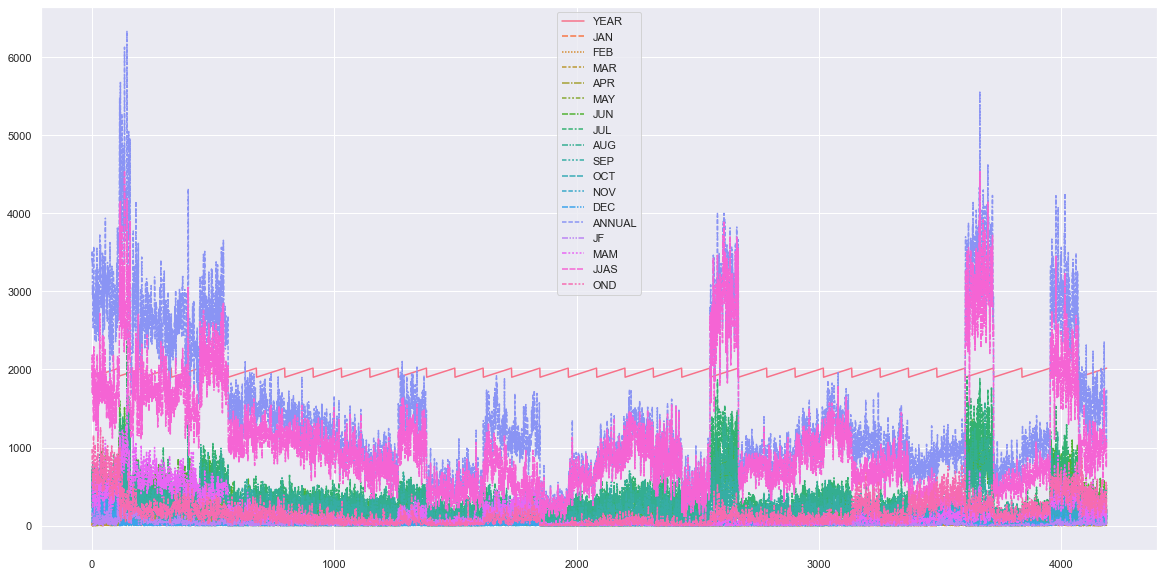

In [6]:
sns.set(rc = {'figure.figsize':(20,10)})
p = sns.lineplot(data = df)

In [7]:
df.describe(include = 'all')

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188,4188.000000,4184.000000,4185.000000,4182.000000,4184.000000,4185.000000,4183.000000,4181.000000,4184.000000,4182.000000,4181.000000,4177.000000,4178.000000,4162.000000,4182.000000,4179.000000,4178.000000,4175.000000
unique,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,West Madhya Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,NaN,33.717097,33.793128,35.731734,46.927963,68.150985,122.695137,234.292087,268.850702,188.426071,135.547646,99.194851,68.358706,43.053759,902.599421,59.293904,201.198627,706.666045,166.863171
min,NaN,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,NaN,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.800000,175.600000,155.850000,100.400000,14.600000,0.600000,0.100000,803.025000,4.000000,24.000000,573.850000,34.000000
50%,NaN,1959.000000,5.950000,6.500000,7.900000,15.450000,36.900000,138.800000,285.000000,258.500000,173.700000,65.200000,9.400000,3.000000,1120.350000,18.900000,74.800000,880.600000,97.700000
75%,NaN,1988.000000,22.000000,26.600000,31.375000,49.650000,97.800000,305.000000,418.500000,377.625000,266.125000,148.300000,45.300000,17.500000,1643.575000,50.175000,196.950000,1287.450000,211.800000


In [8]:
df.columns

Index(['STATE_UT_NAME', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

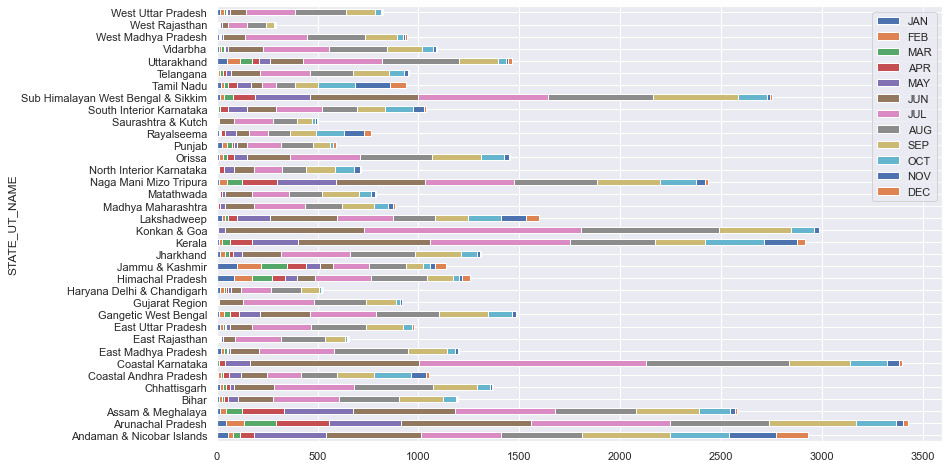

In [9]:
df[['STATE_UT_NAME', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("STATE_UT_NAME").mean().plot.barh(stacked=True,figsize=(13,8));

<AxesSubplot:xlabel='STATE_UT_NAME', ylabel='ANNUAL'>

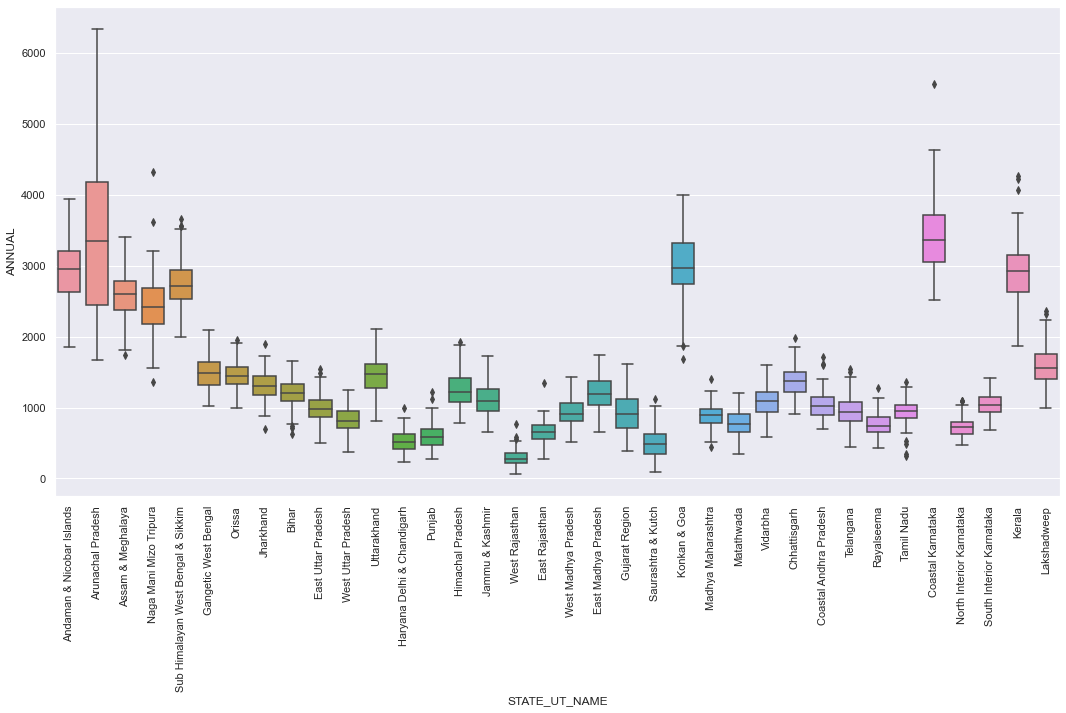

In [10]:
fig = plt.figure(figsize=(18, 9))
plt.xticks(rotation='vertical')
sns.boxplot(x='STATE_UT_NAME', y='ANNUAL', data=df)

Histograms showing the data from attributes (JAN to DEC) of the YEAR 1901-2017:


<AxesSubplot:>

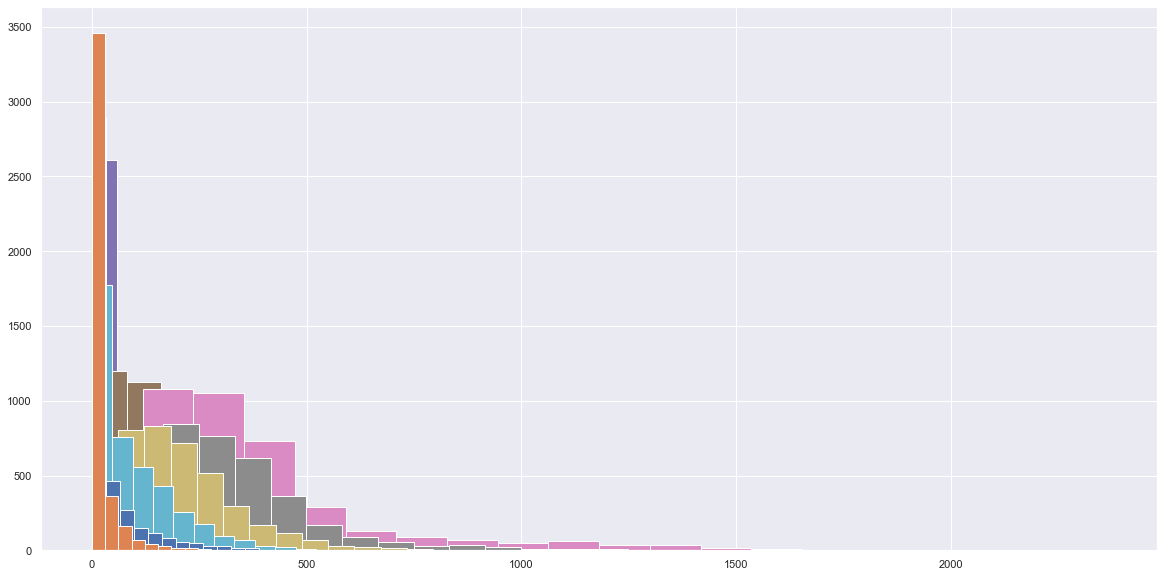

In [11]:

data=df
print("Histograms showing the data from attributes (JAN to DEC) of the YEAR 1901-2017:")
data['JAN'].hist(bins=20)
data['FEB'].hist(bins=20)
data['MAR'].hist(bins=20)
data['APR'].hist(bins=20)
data['MAY'].hist(bins=20)
data['JUN'].hist(bins=20)
data['JUL'].hist(bins=20)
data['AUG'].hist(bins=20)
data['SEP'].hist(bins=20)
data['OCT'].hist(bins=20)
data['NOV'].hist(bins=20)
data['DEC'].hist(bins=20)

In [12]:
wb=df[df.STATE_UT_NAME == 'Sub Himalayan West Bengal & Sikkim']

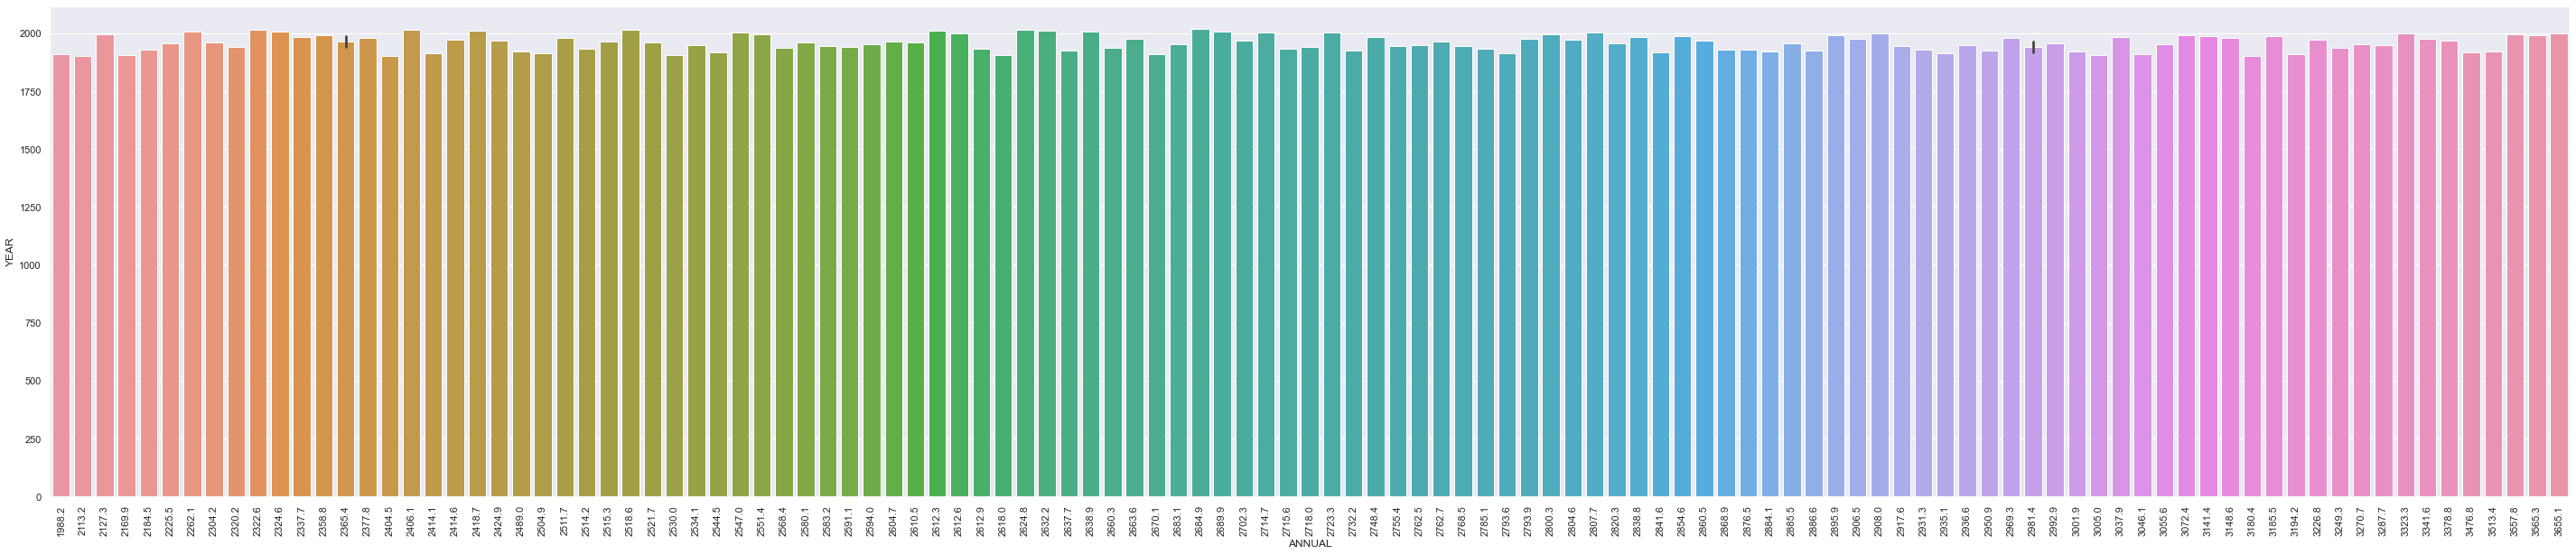

In [13]:
plt.figure(figsize=(50,10))
sns.barplot(data= wb,x="ANNUAL",y="YEAR")  
plt.xticks(rotation=90)
plt.show()

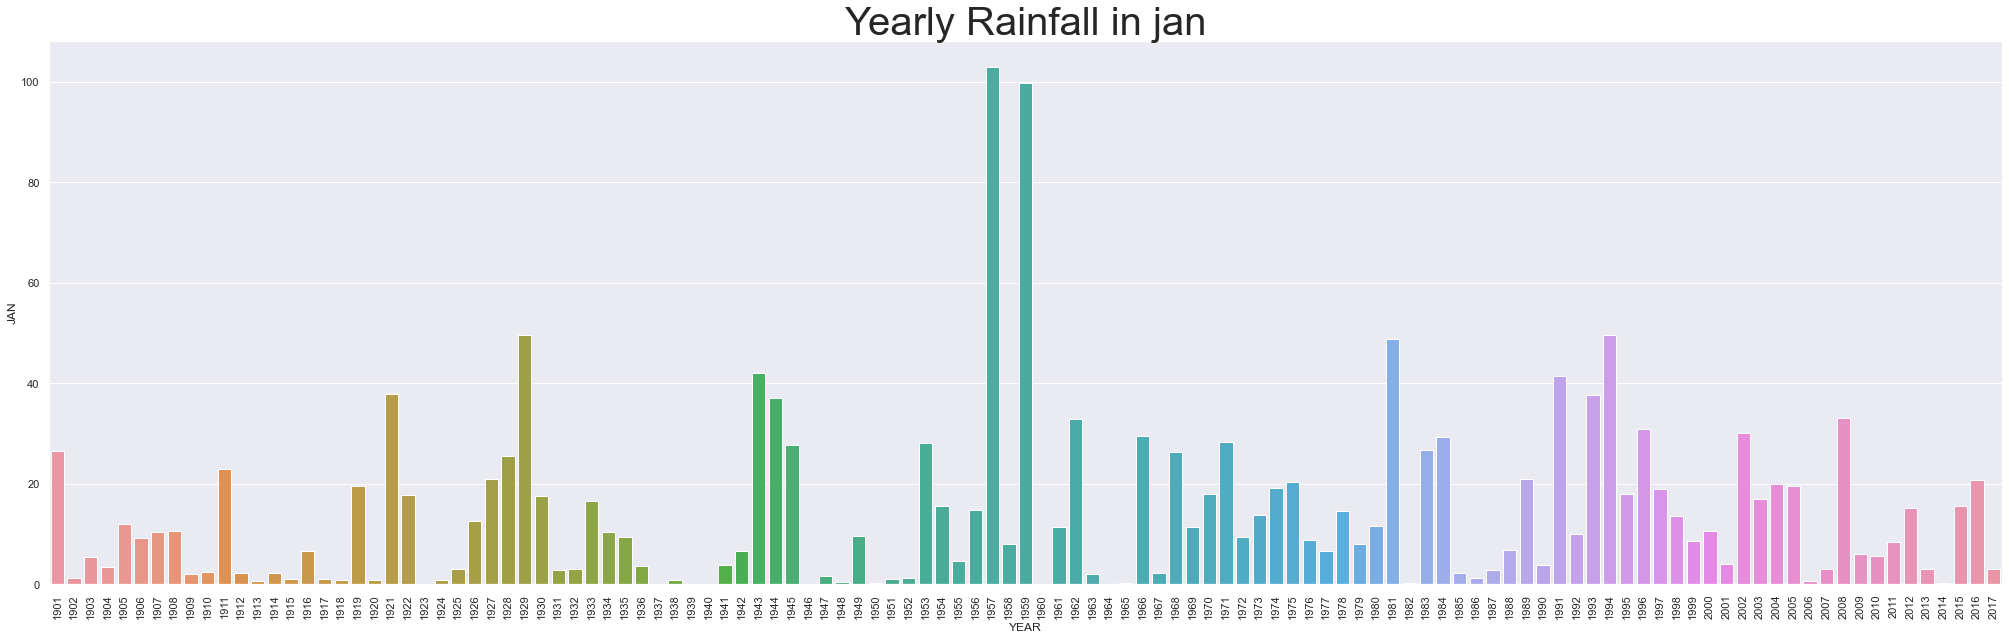

In [14]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in jan", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="JAN")
plt.xticks(rotation=90)
plt.show()

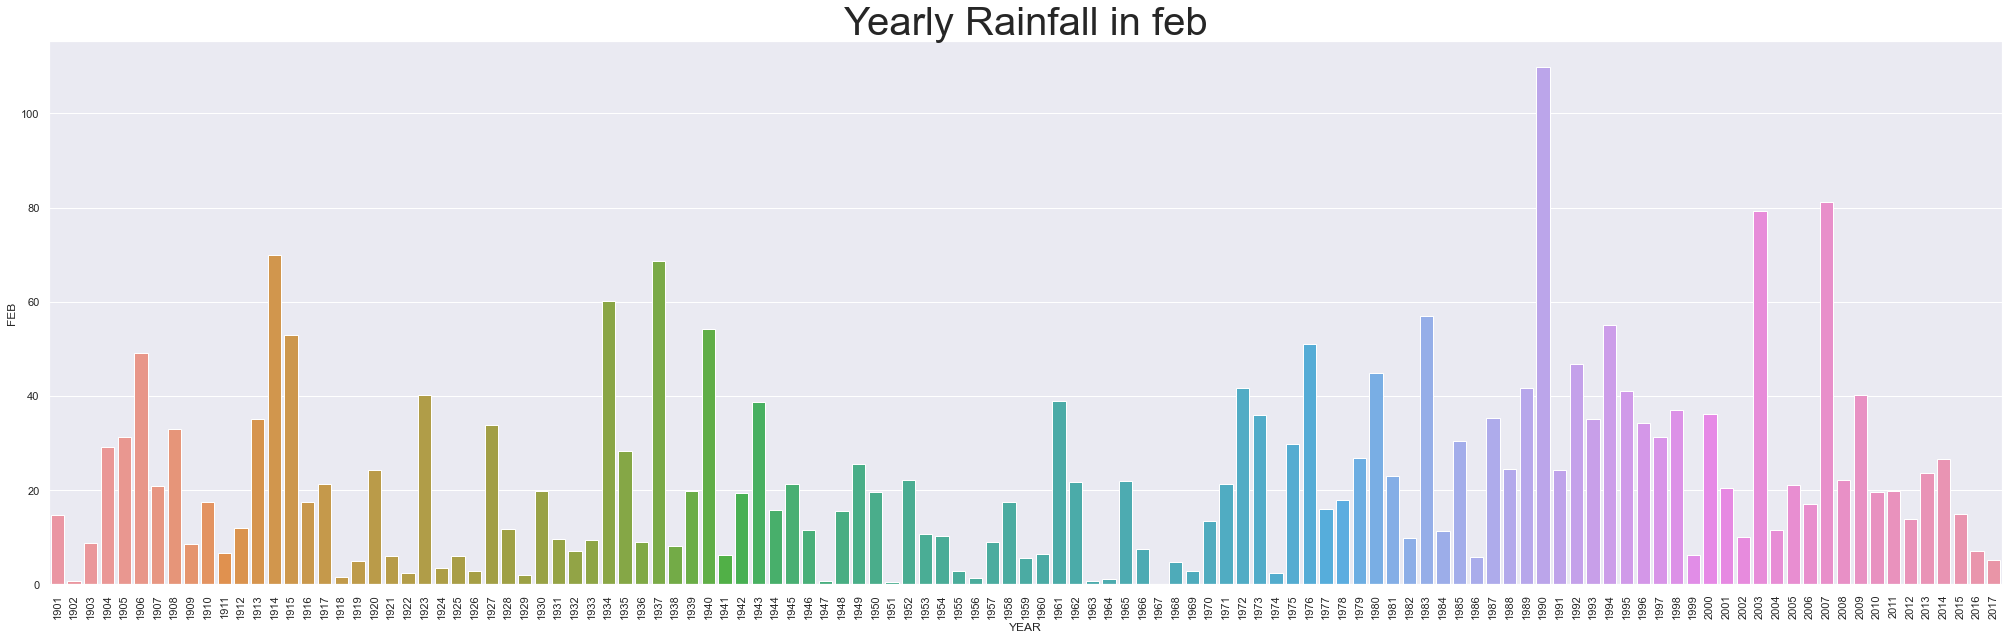

In [15]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in feb", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="FEB")
plt.xticks(rotation=90)
plt.show()

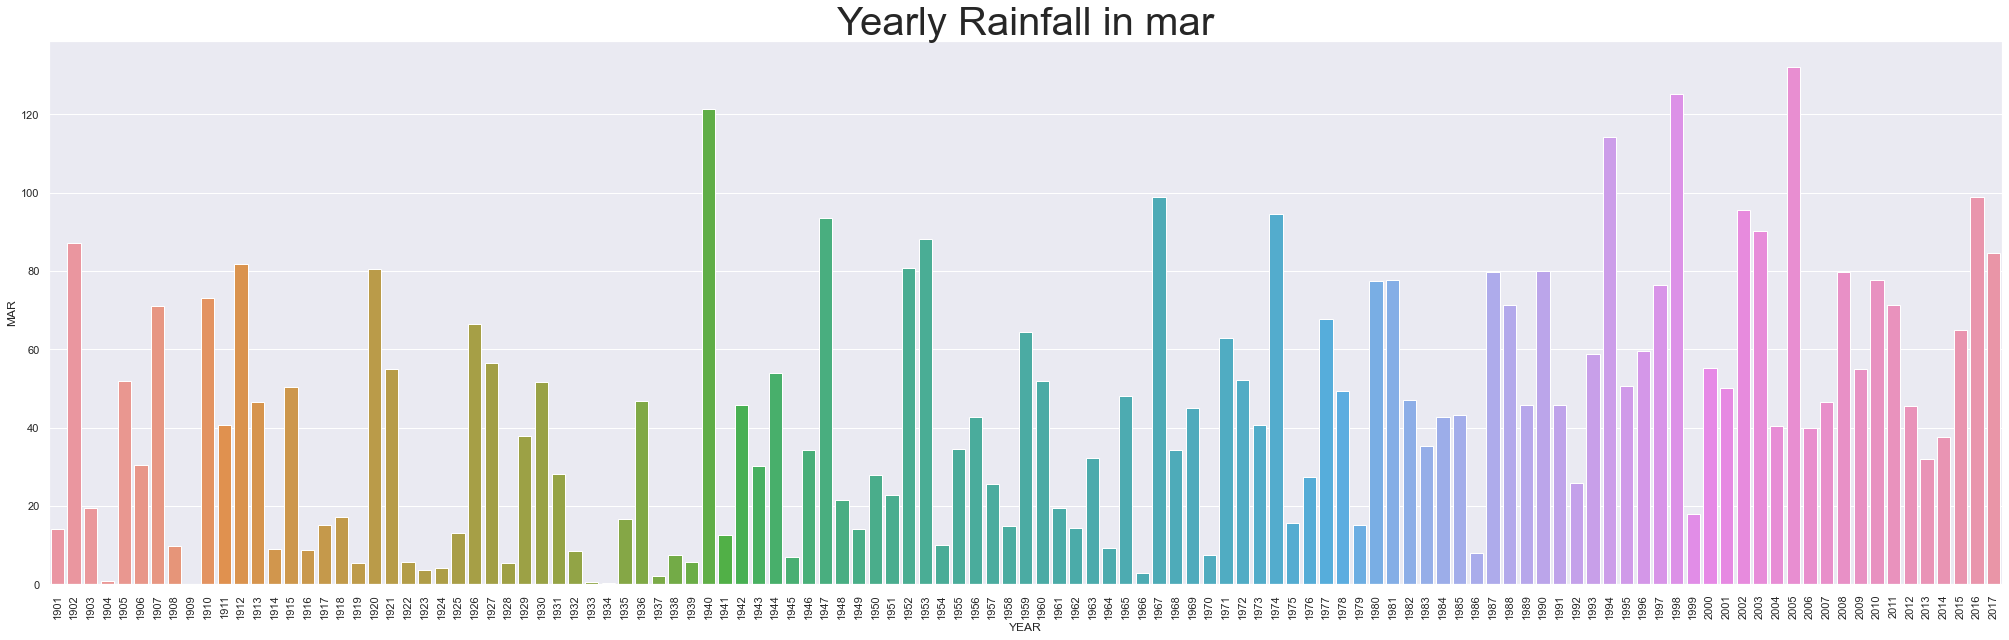

In [16]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in mar", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="MAR")
plt.xticks(rotation=90)
plt.show()

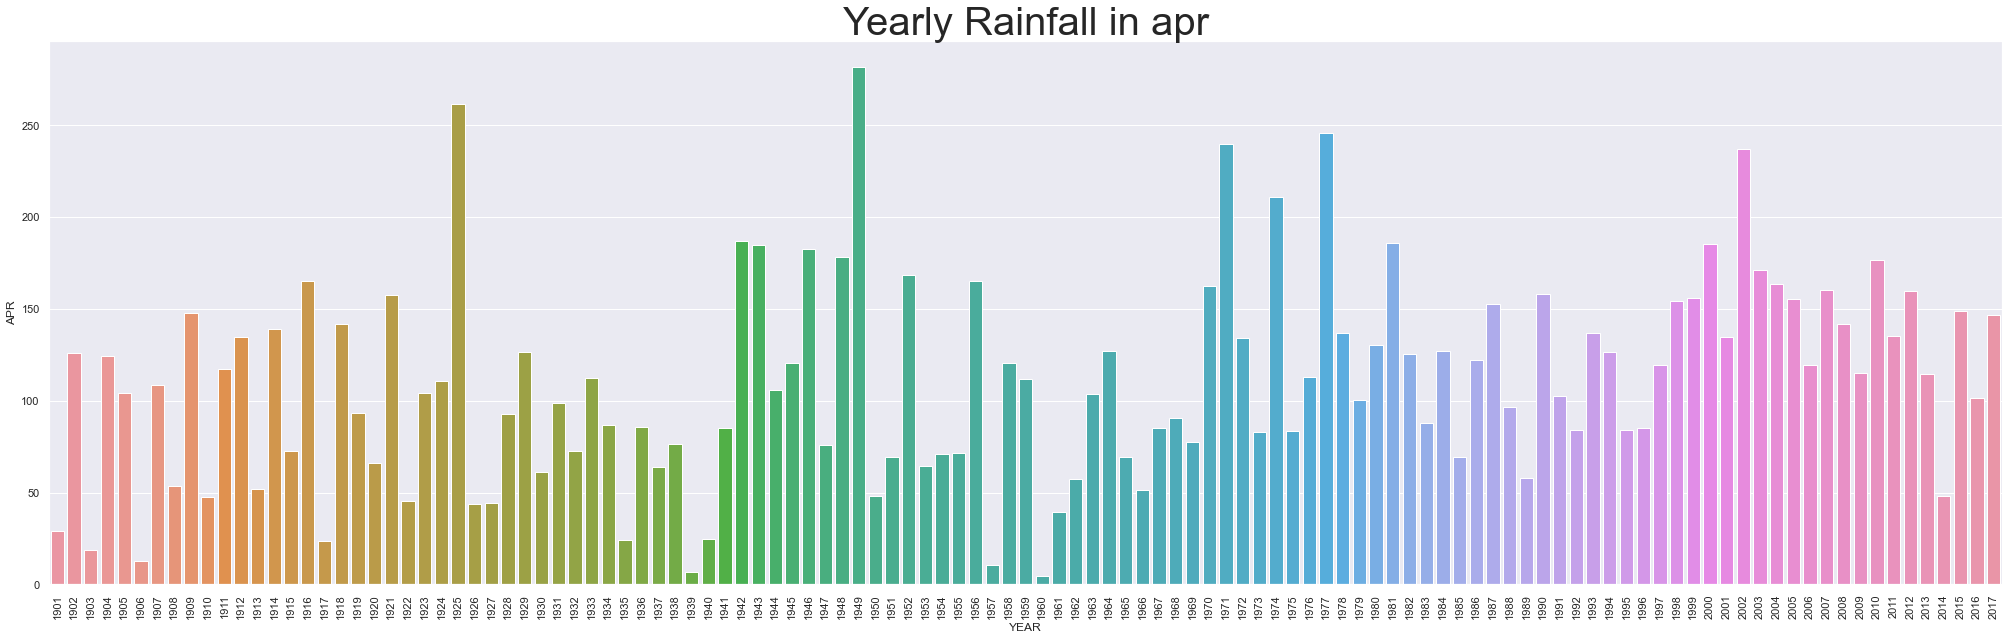

In [17]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in apr", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="APR")
plt.xticks(rotation=90)
plt.show()

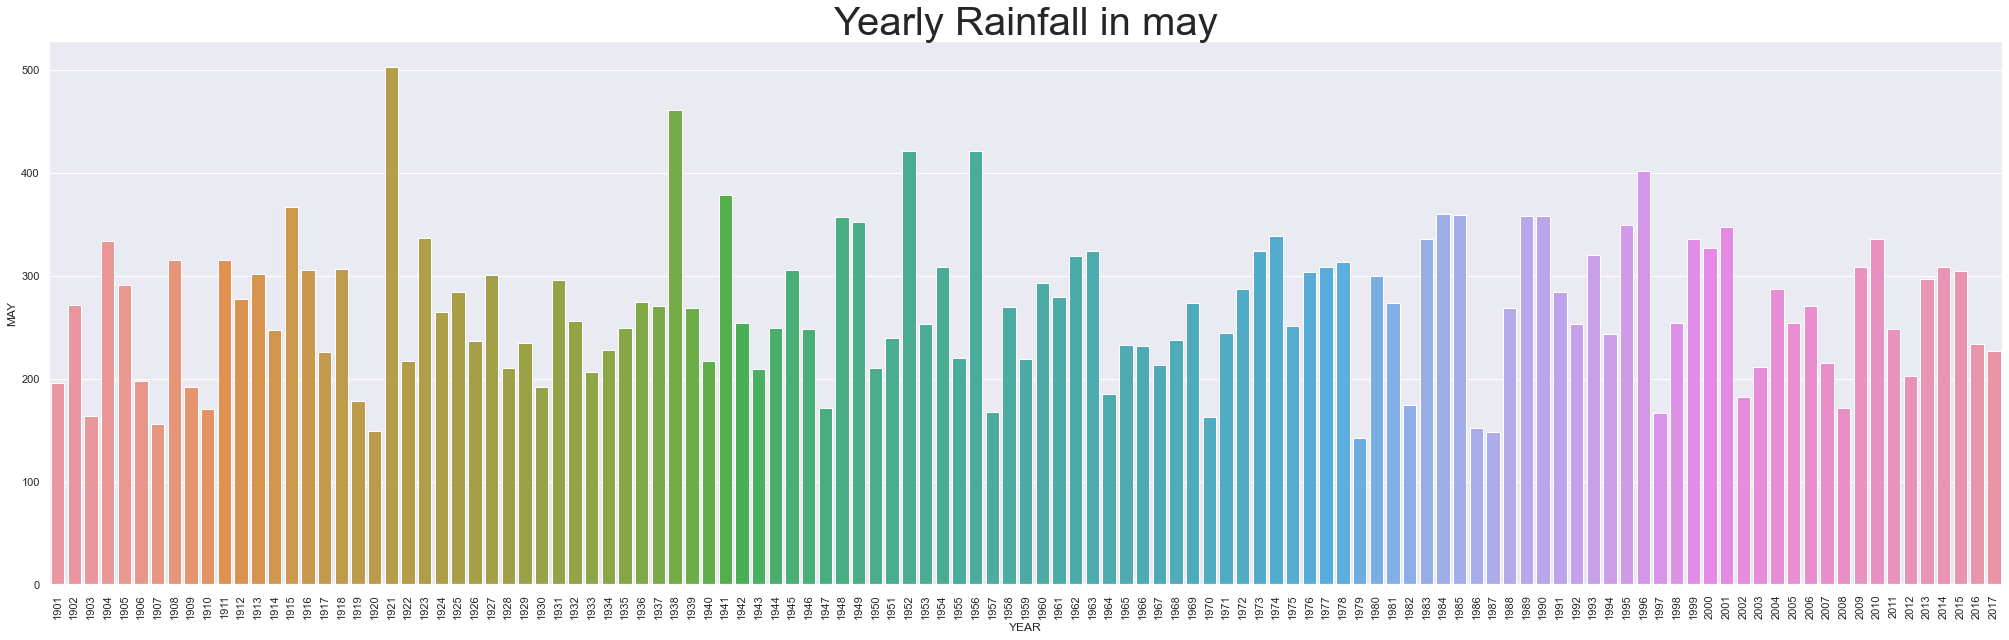

In [18]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in may", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="MAY")
plt.xticks(rotation=90)
plt.show()

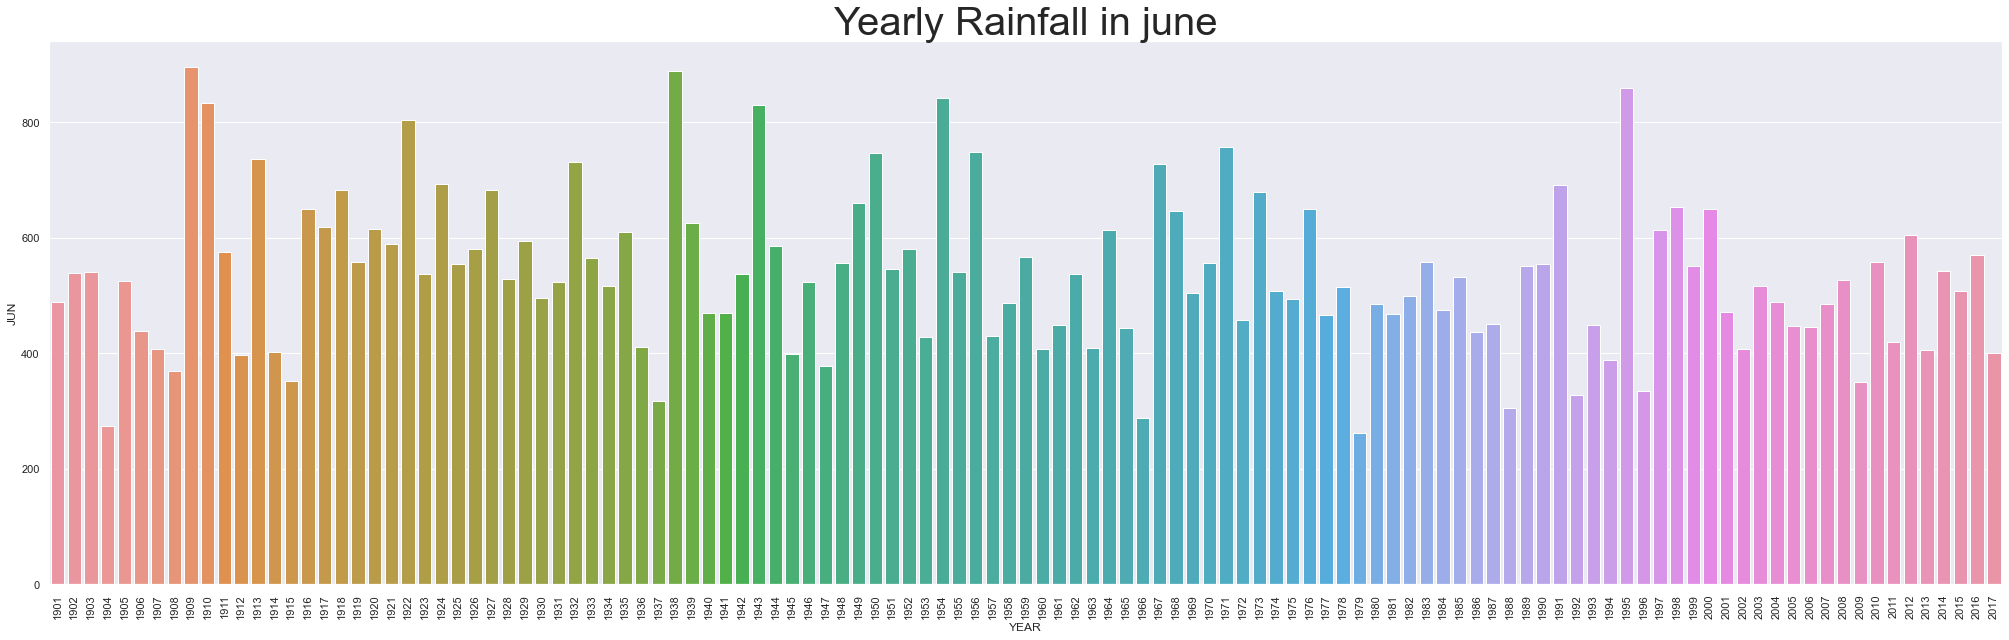

In [19]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in june", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="JUN")
plt.xticks(rotation=90)
plt.show()

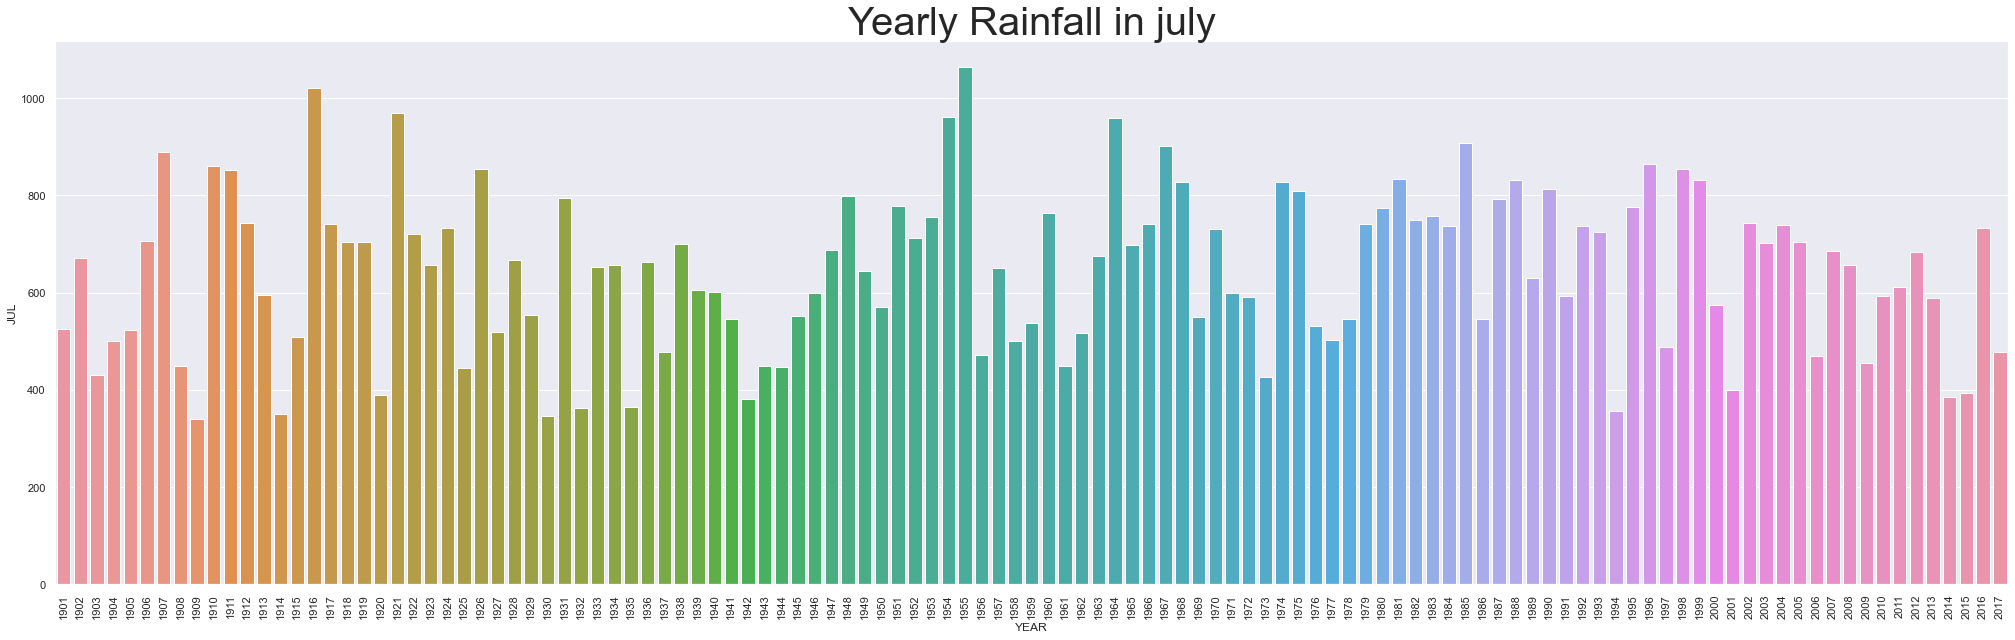

In [20]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in july", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="JUL")
plt.xticks(rotation=90)
plt.show()

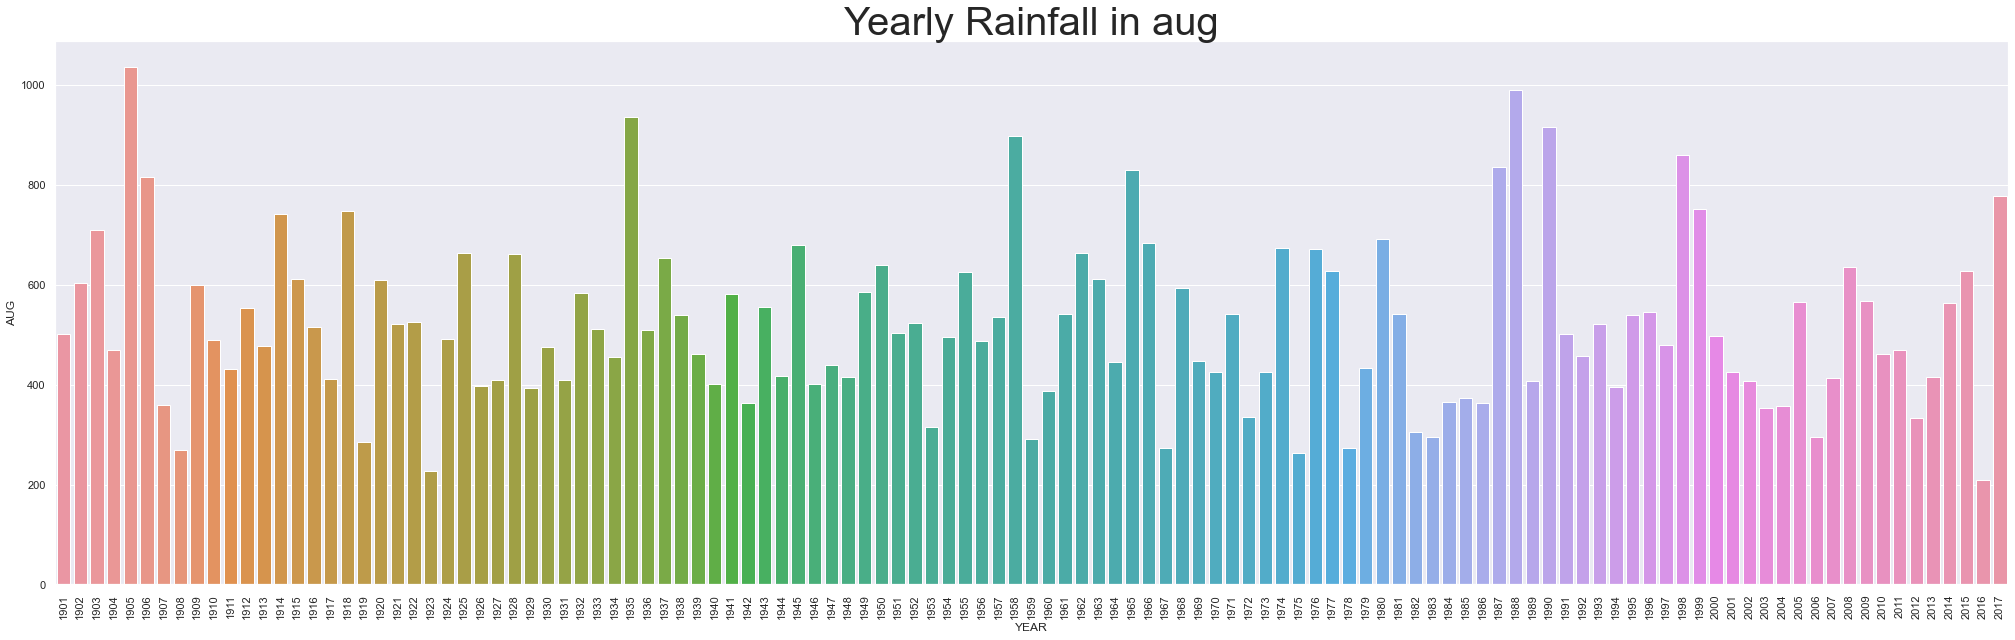

In [21]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in aug", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="AUG")
plt.xticks(rotation=90)
plt.show()

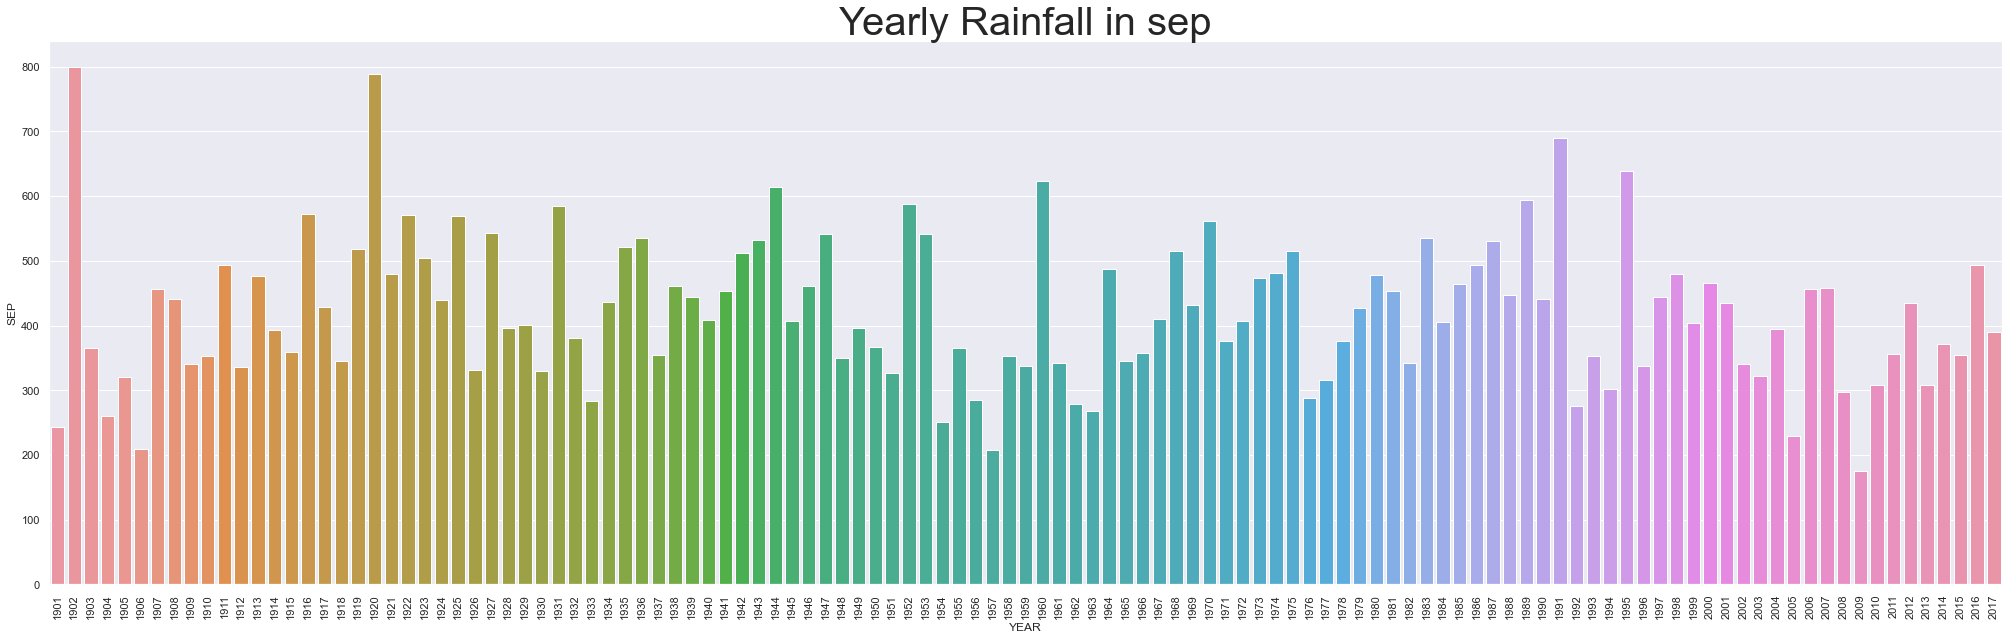

In [22]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in sep", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="SEP")
plt.xticks(rotation=90)
plt.show()

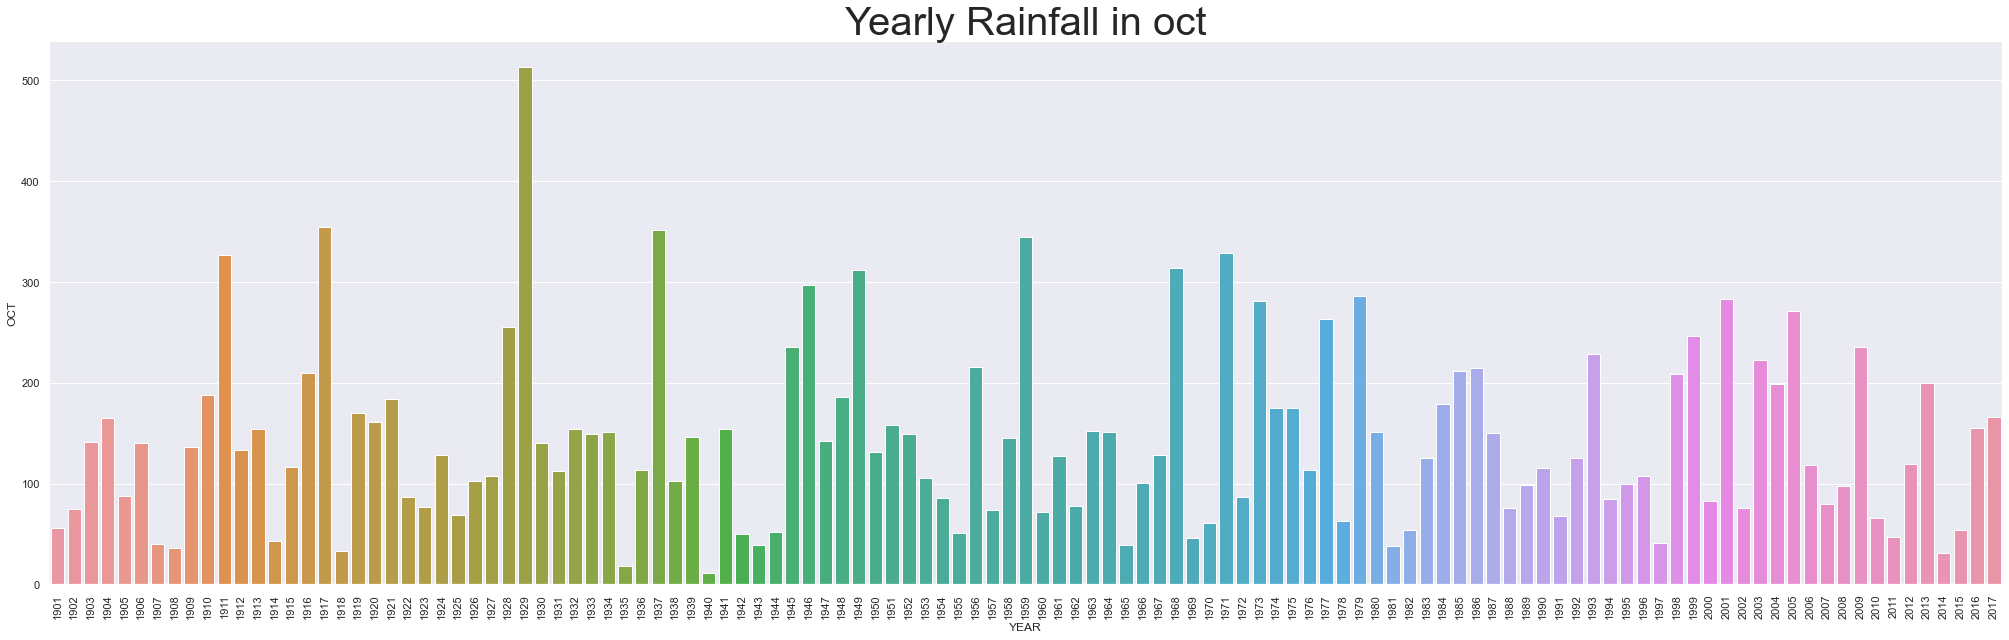

In [23]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in oct", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="OCT")
plt.xticks(rotation=90)
plt.show()

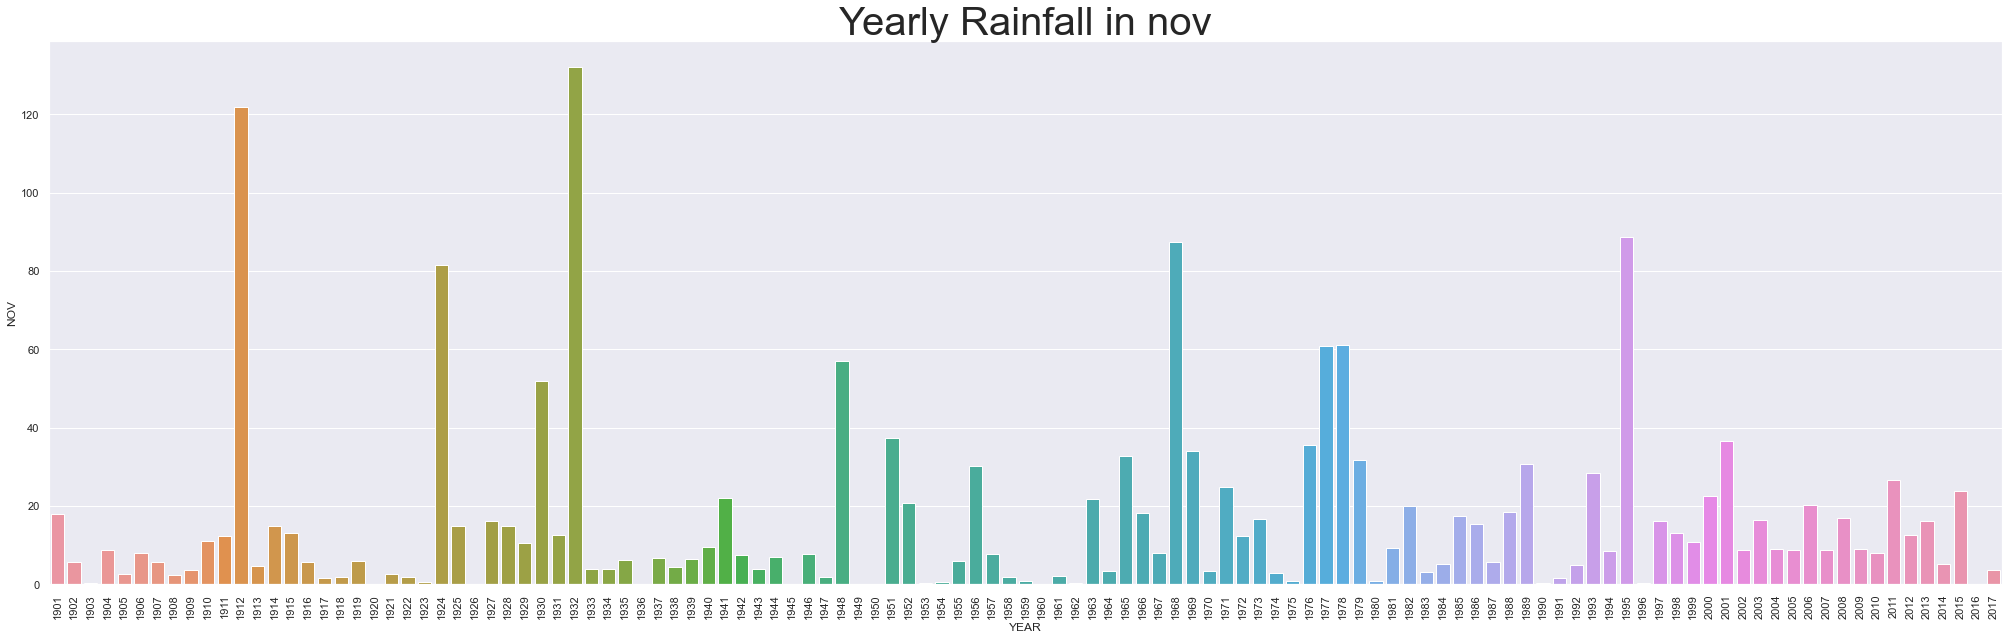

In [24]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in nov", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="NOV")
plt.xticks(rotation=90)
plt.show()

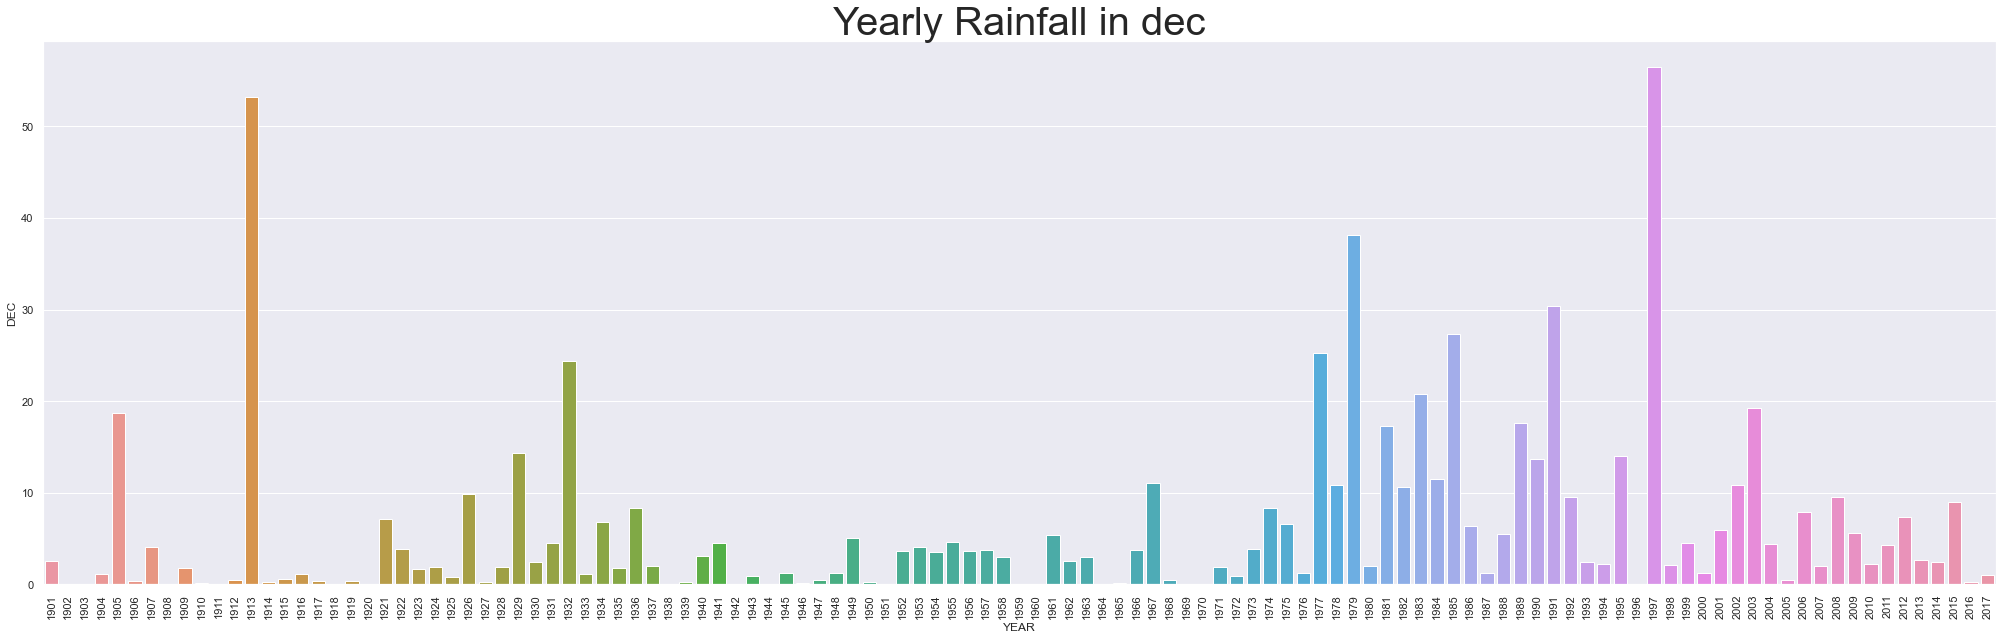

In [25]:
plt.figure(figsize=(35,10))
plt.title("Yearly Rainfall in dec", fontsize=40)
sns.barplot(data=wb,x="YEAR",y="DEC")
group = wb[['YEAR','DEC']].sort_values(['DEC'],ascending = True)
plt.xticks(rotation=90)
plt.show()

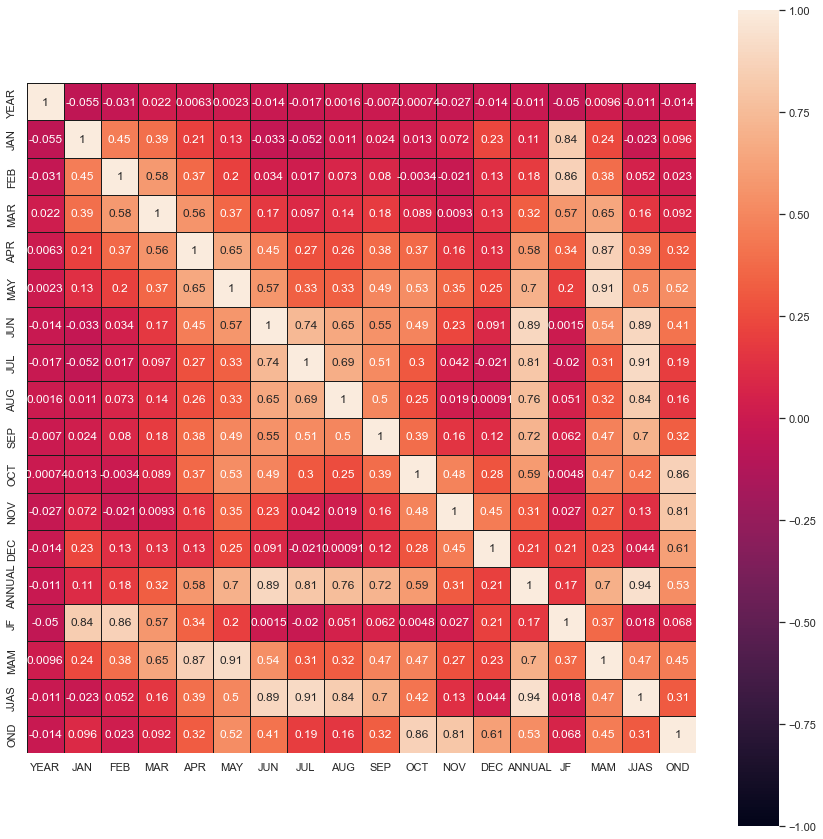

In [26]:
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)


In [27]:
subdivision_group =df.groupby('STATE_UT_NAME').mean()
subdivision_group
subdivision_group['STATE_UT_NAME'] = subdivision_group.index
group = subdivision_group[['STATE_UT_NAME','ANNUAL']].sort_values(['ANNUAL'],ascending = True)

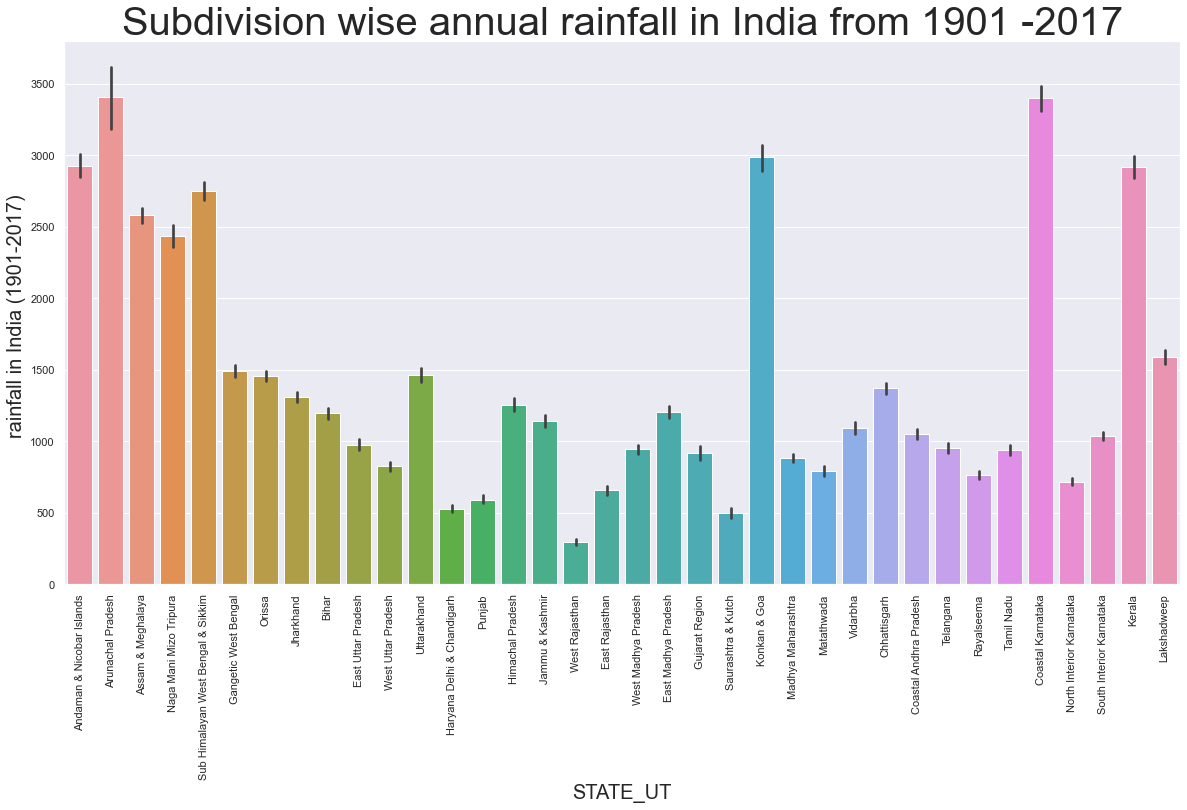

In [28]:
plt.subplots(figsize = (20,10))
sns.barplot('STATE_UT_NAME','ANNUAL',data = df)
group = df[['STATE_UT_NAME','ANNUAL']].sort_values(['ANNUAL'],ascending = True)
plt.xlabel('STATE_UT',fontsize = 20)
plt.ylabel('rainfall in India (1901-2017) ',fontsize = 20)
plt.title('Subdivision wise annual rainfall in India from 1901 -2017',fontsize = 40)
plt.xticks(rotation = 90);

In [29]:
 data = np.asarray(df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
print(np.shape(data))

(4188, 12)


In [30]:
wb.head()

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
445,Sub Himalayan West Bengal & Sikkim,1901,26.5,14.8,14.1,29.2,195.5,488.4,524.8,501.1,242.7,55.5,17.9,2.6,2113.2,41.3,238.9,1757.0,76.1
446,Sub Himalayan West Bengal & Sikkim,1902,1.2,0.7,87.1,126.1,271.3,539.2,671.0,603.8,799.9,74.4,5.6,0.0,3180.4,1.9,484.6,2613.9,80.1
447,Sub Himalayan West Bengal & Sikkim,1903,5.5,8.7,19.6,18.6,163.6,541.2,431.5,708.8,365.2,141.3,0.3,0.0,2404.5,14.3,201.9,2046.7,141.6
448,Sub Himalayan West Bengal & Sikkim,1904,3.4,29.2,0.9,124.3,333.6,274.2,500.4,468.5,260.6,164.8,8.9,1.1,2169.9,32.5,458.8,1503.7,174.8
449,Sub Himalayan West Bengal & Sikkim,1905,12.0,31.2,51.9,104.4,290.6,524.8,523.1,1036.6,321.1,87.9,2.7,18.7,3005.0,43.2,447.0,2405.6,109.3


In [31]:
data = np.asarray(wb[['FEB', 'MAR', 'APR','MAY']])
print(np.shape(data))
X = data[:,0:3]
y = data[:,3]

(117, 4)


In [32]:
data = np.asarray(wb[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
print(np.shape(data))

(117, 12)


In [33]:
X = None; y = None
for i in range(data.shape[1]-3):
    if X is None:
        X = data[:, i:i+3]
        y = data[:, i+3]
    else:
        X = np.concatenate((X, data[:, i:i+3]), axis=0)
        y = np.concatenate((y, data[:, i+3]), axis=0)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
 np.shape(X_test)

(211, 3)

In [36]:
#Random Forest Regression

rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_absolute_error(y_test, y_pred)

100.16129272283773

In [37]:
xx = np.arange(start=0,stop=len(y_pred),step=1)

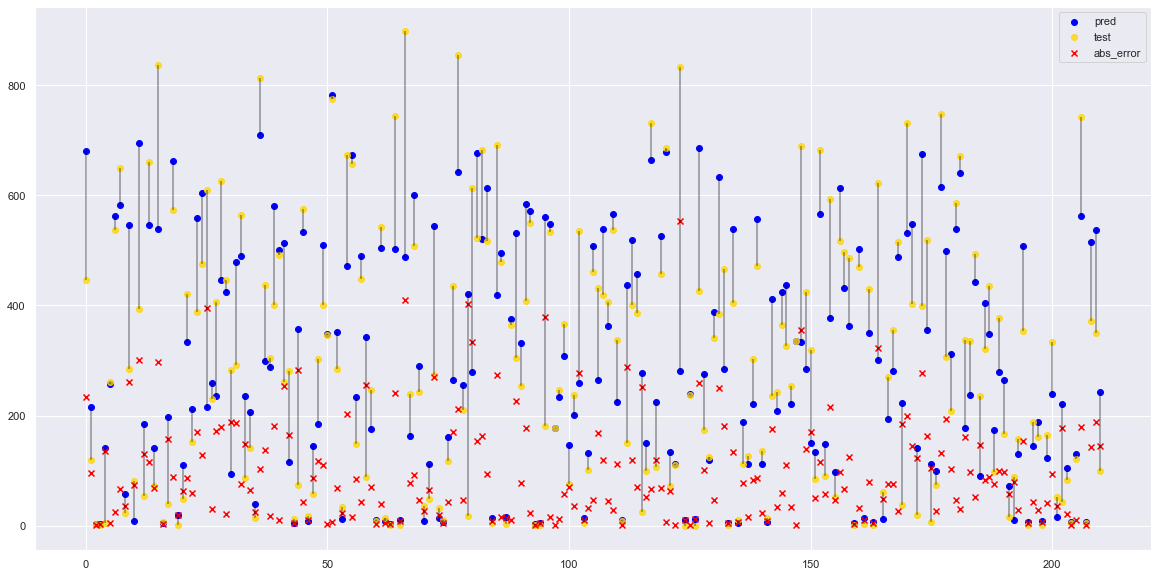

In [38]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='blue', alpha=1, label='pred')
plt.scatter( xx,y_test, color='gold', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='red',label='abs_error',marker='x')
plt.legend()

In [39]:
linear_regressor = LinearRegression()  
linear_regressor.fit(X_train, y_train)  
Y_pred = linear_regressor.predict(X_test)  
mean_absolute_error(y_test, Y_pred)

123.40191568757226

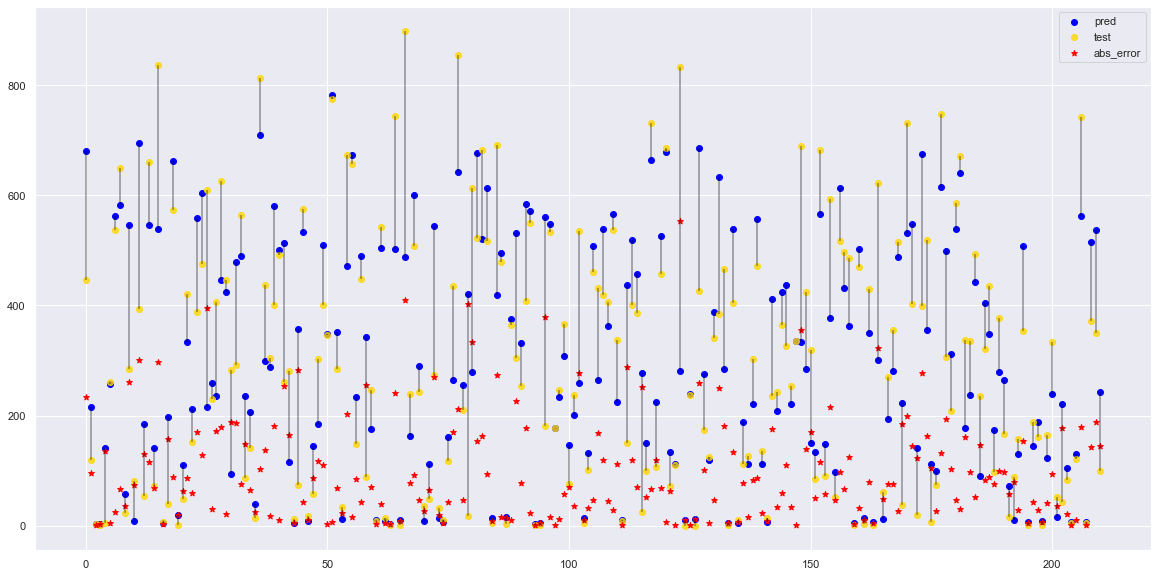

In [40]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='blue', alpha=1, label='pred')
plt.scatter( xx,y_test, color='gold', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='red',label='abs_error',marker='*')
plt.legend()

In [41]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X, y)
y_pred = rf.predict(X)
mean_absolute_error(y, y_pred)

53.60476538788333

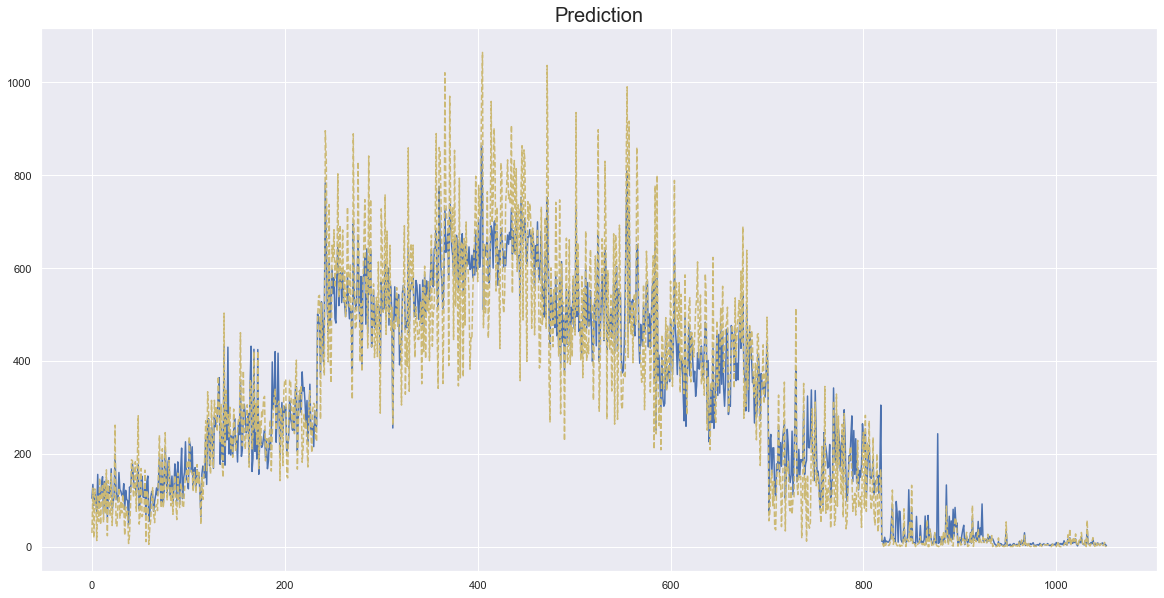

In [42]:
x_tot =np.arange(start=0,stop=len(y_pred),step=1)
plt.plot(x_tot,y_pred)
plt.title("Prediction",size=20)
plt.plot(x_tot,y, "y--")